# 打造客製化看盤軟體

In [80]:
import pandas as pd
import sqlite3
import os

# connect to sql
conn = sqlite3.connect(os.path.join('data', "data.db"))

# read data from sql
df = pd.read_sql('select stock_id, date, 開盤價, 收盤價, 最高價, 最低價, 成交股數 from price where stock_id="0050"', conn,
                index_col=['date'], parse_dates=['date'])

# rename the columns of dataframe
df.rename(columns={'收盤價':'close', '開盤價':'open', '最高價':'high', '最低價':'low', '成交股數':'volume'}, inplace=True)

len(df)

2938

### install TA-Lib
https://github.com/mrjbq7/ta-lib

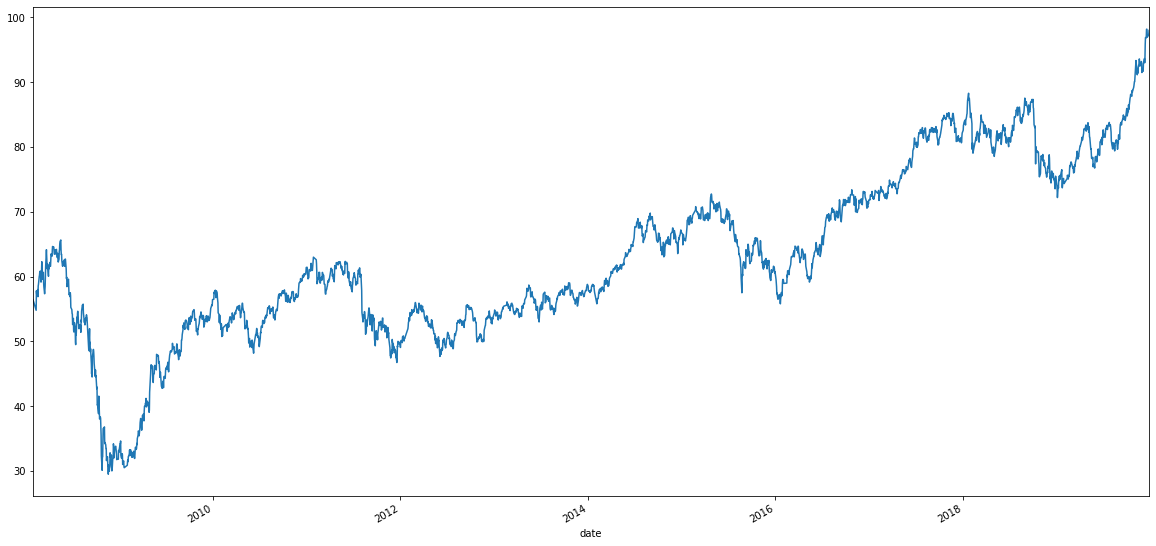

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt

## change the size of plot
plt.rcParams["figure.figsize"] = (20,10)

## plot close price
df['close'].plot()

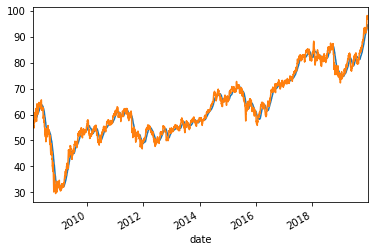

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
from talib import abstract

# 畫出均線
abstract.SMA(df).plot()

# 畫出收盤價
df['close'].plot()

RSI([input_arrays], [timeperiod=30])

Relative Strength Index (Momentum Indicators)

Inputs:
    price: (any ndarray)
Parameters:
    timeperiod: 30
Outputs:
    real


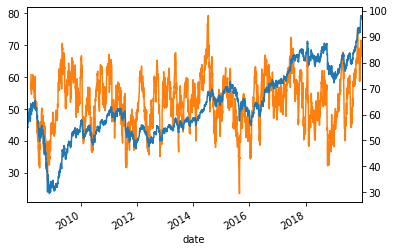

In [83]:
print(abstract.RSI)

# 畫出收盤價 並且將收盤價的y軸在右方
df['close'].plot(secondary_y=True)

# 讓 RSI 的y軸在左方
abstract.RSI(df, timeperiod=30).plot()

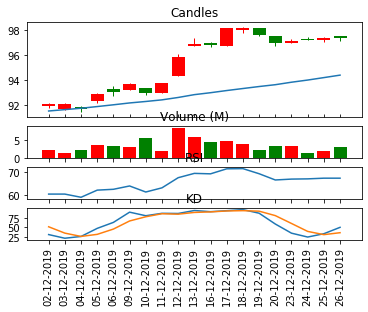

In [55]:
from talib import abstract

# 創建各種指標
SMA = abstract.SMA(df)
RSI = abstract.RSI(df)
STOCH = abstract.STOCH(df)

from finlab.plot_candles import plot_candles
plot_candles(
             # 起始時間、結束時間
             start_time='2019-12-02',
             end_time='2019-12-26',
             
             # 股票的資料
             pricing=df, 
             title='Candles', 
    
             # 是否畫出成交量？
             volume_bars=True, 
    
             # 將某些指標（如SMA）跟 K 線圖畫在一起
             overlays=[SMA], 
    
             # 將某些指標（如RSI, STOCH）單獨畫在獨立的畫格中
             technicals = [RSI, STOCH],
    
             # 重新命名額外的畫格名稱（跟指標名稱一樣就可以囉！）
             technicals_titles=['RSI', 'KD']
            )